In [1]:
%load_ext autoreload
%autoreload 2

# Import packages

In [2]:
from moscot import FusedGW
from ott.geometry.geometry import Geometry
from jax import numpy as jnp

In [3]:
import matplotlib.pyplot as pl
import numpy as np
import ot
from ot.gromov import fused_gromov_wasserstein

In [4]:
# taken from: https://pythonot.github.io/auto_examples/gromov/plot_fgw.html#sphx-glr-auto-examples-plot-fgw-py
n = 20  # number of points in the first distribution
n2 = 30  # number of points in the second distribution
sig = 1  # std of first distribution
sig2 = 0.1  # std of second distribution

np.random.seed(0)

phi = np.arange(n)[:, None]
xs = phi + sig * np.random.randn(n, 1)
ys = np.vstack((np.ones((n // 2, 1)), 0 * np.ones((n // 2, 1)))) + sig2 * np.random.randn(n, 1)

phi2 = np.arange(n2)[:, None]
xt = phi2 + sig * np.random.randn(n2, 1)
yt = np.vstack((np.ones((n2 // 2, 1)), 0 * np.ones((n2 // 2, 1)))) + sig2 * np.random.randn(n2, 1)
yt = yt[::-1, :]

p = ot.unif(n)
q = ot.unif(n2)

# Visualize the data

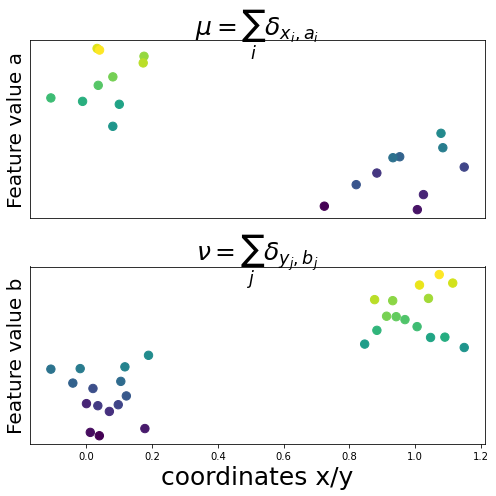

In [5]:
pl.close(10)
pl.figure(10, (7, 7))

pl.subplot(2, 1, 1)

pl.scatter(ys, xs, c=phi, s=70)
pl.ylabel('Feature value a', fontsize=20)
pl.title('$\mu=\sum_i \delta_{x_i,a_i}$', fontsize=25, y=1)
pl.xticks(())
pl.yticks(())
pl.subplot(2, 1, 2)
pl.scatter(yt, xt, c=phi2, s=70)
pl.xlabel('coordinates x/y', fontsize=25)
pl.ylabel('Feature value b', fontsize=20)
pl.title('$\\nu=\sum_j \delta_{y_j,b_j}$', fontsize=25, y=1)
pl.yticks(())
pl.tight_layout()
pl.show()

# Run FGW

In [6]:
alpha = 1e-3
epsilon = 1e-1

C1 = ot.dist(xs)
C2 = ot.dist(xt)
M = ot.dist(ys, yt)
w1 = ot.unif(C1.shape[0])
w2 = ot.unif(C2.shape[0])

## moscot

In [7]:
C1_g = Geometry(cost_matrix=jnp.asarray(C1))
C2_g = Geometry(cost_matrix=jnp.asarray(C2))
M_g = Geometry(cost_matrix=jnp.asarray(M))

fgwot = FusedGW(alpha=alpha, epsilon=epsilon)
fgwot.fit(C1_g, C2_g, M_g, log=True, n_iters=10, tol=1e-9)

1. err=0.12826894223690033 tau=0.0
2. err=0.047398652881383896 tau=0.0
3. err=0.0016604686388745904 tau=0.0
4. err=6.436156581912655e-06 tau=0.0
5. err=4.969887868355727e-06 tau=0.0
6. err=1.2275319022592157e-05 tau=0.0
7. err=4.21150525653502e-06 tau=0.0
8. err=1.0436251614009961e-05 tau=0.0
9. err=2.1056448531453498e-05 tau=0.0
10. err=1.2818939467251766e-05 tau=0.0


Text(0.5, 1.0, 'FGW - scott ($M+C_1,C_2$)')

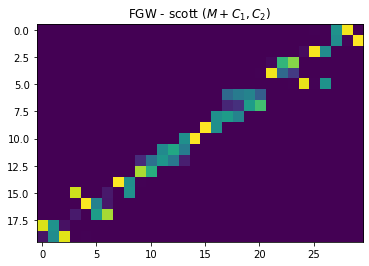

In [8]:
pl.imshow(fgwot.matrix, cmap='viridis', interpolation='nearest')
pl.title('FGW - scott ($M+C_1,C_2$)')

## POT

In [9]:
Gwg, logw = fused_gromov_wasserstein(M, C1, C2, p, q, loss_fun='square_loss',
                                     armijo=True,
                                     alpha=alpha, verbose=True, log=True)

It.  |Loss        |Relative loss|Absolute loss
------------------------------------------------
    0|4.734412e+01|0.000000e+00|0.000000e+00
    1|2.545195e+01|8.601369e-01|2.189217e+01
    2|2.193071e+01|1.605624e-01|3.521246e+00
    3|2.189364e+01|1.693089e-03|3.706788e-02
    4|2.189327e+01|1.693965e-05|3.708644e-04
    5|2.189327e+01|1.693974e-07|3.708662e-06
    6|2.189327e+01|1.693974e-09|3.708662e-08
    7|2.189327e+01|1.693949e-11|3.708607e-10


Text(0.5, 1.0, 'FGW - POT ($M+C_1,C_2$)')

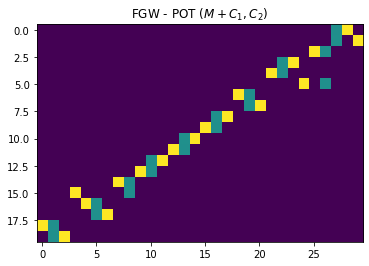

In [10]:
pl.imshow(Gwg, cmap='viridis', interpolation='nearest')
pl.title('FGW - POT ($M+C_1,C_2$)')